In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import logging
import numpy as np
from scipy.stats import chi2_contingency

logging.basicConfig(level=logging.WARNING, format='%(asctime)s - %(levelname)s - %(message)s')

### Import

In [40]:
pd.set_option('display.max_columns', None)
train = pd.read_csv("data/train.csv", index_col="id")
train.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [41]:
# No missing values!
train.isnull().sum().sum()

0

### Histograms and tally's for the columns

In [42]:
train["Target"].value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

In [44]:
Categorical = ["Marital status", 
               "Application mode", 
               "Application order", 
               "Course", 
               "Previous qualification", 
               "Nacionality", 
               "Mother's qualification", 
               "Father's qualification", 
               "Mother's occupation", 
               "Father's occupation"]
Boolean = ["Daytime/evening attendance", 
           "Displaced", 
           "Educational special needs", 
           "Debtor", 
           "Tuition fees up to date", 
           "Gender", 
           "Scholarship holder", 
           "International" ]
Continuous = ["Previous qualification (grade)", 
              "Admission grade", 
              "Age at enrollment", 
              "Curricular units 1st sem (credited)", 
              "Curricular units 1st sem (enrolled)", 
              "Curricular units 1st sem (evaluations)", 
              "Curricular units 1st sem (approved)", 
              "Curricular units 1st sem (grade)", 
              "Curricular units 1st sem (without evaluations)",
              "Curricular units 2nd sem (credited)", 
              "Curricular units 2nd sem (enrolled)", 
              "Curricular units 2nd sem (evaluations)", 
              "Curricular units 2nd sem (approved)", 
              "Curricular units 2nd sem (grade)", 
              "Curricular units 2nd sem (without evaluations)",
              "Unemployment rate",
              "Inflation rate",
              "GDP"]

In [45]:
for column in Categorical:
    print(train[column].value_counts())

Marital status
1    70189
2     5296
4      866
5      116
6       35
3       16
Name: count, dtype: int64
Application mode
1     35227
17    16523
39    14519
44     3012
43     2671
7      1498
18     1256
42      551
51      442
16      265
53      225
15      183
5        87
10       43
2         8
27        2
12        1
26        1
4         1
35        1
9         1
3         1
Name: count, dtype: int64
Application order
1    54381
2     8875
3     5364
4     3822
5     2125
6     1947
0        3
9        1
Name: count, dtype: int64
Course
9500    12074
9773     8214
9238     7935
9147     7741
9254     5425
9085     5373
9670     4760
9991     4057
9003     3733
9070     3281
9853     3198
9119     3004
171      2859
8014     2438
9130     1606
9556      746
33         72
979         1
39          1
Name: count, dtype: int64
Previous qualification
1     67183
19     2947
39     2928
3      1401
12      899
9       308
40      259
42      229
2        98
6        98
10       43


In [46]:
for column in Boolean:
    print(train[column].value_counts())

Daytime/evening attendance
1    70038
0     6480
Name: count, dtype: int64
Displaced
1    43559
0    32959
Name: count, dtype: int64
Educational special needs
0    76232
1      286
Name: count, dtype: int64
Debtor
0    71056
1     5462
Name: count, dtype: int64
Tuition fees up to date
1    68380
0     8138
Name: count, dtype: int64
Gender
0    52352
1    24166
Name: count, dtype: int64
Scholarship holder
0    57588
1    18930
Name: count, dtype: int64
International
0    76011
1      507
Name: count, dtype: int64


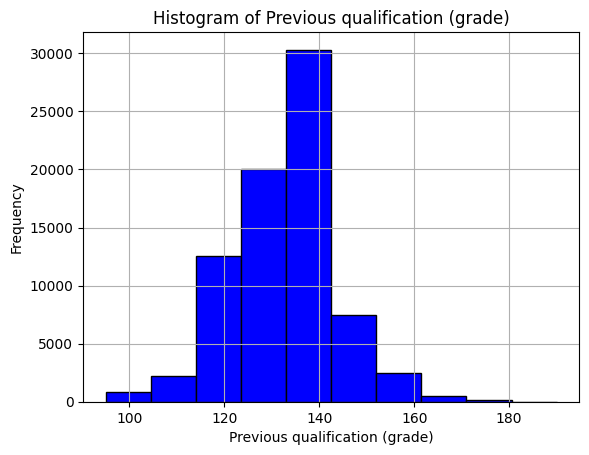

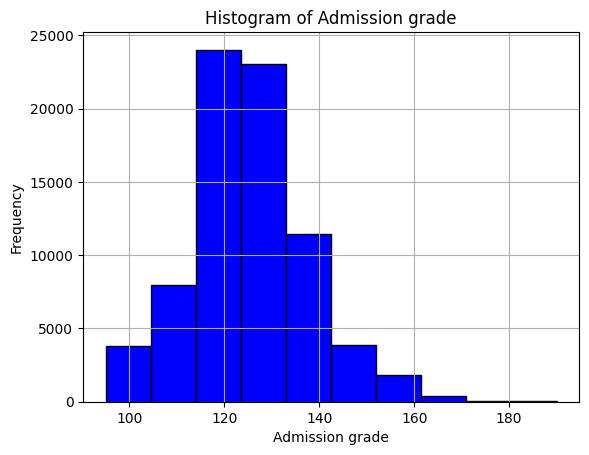

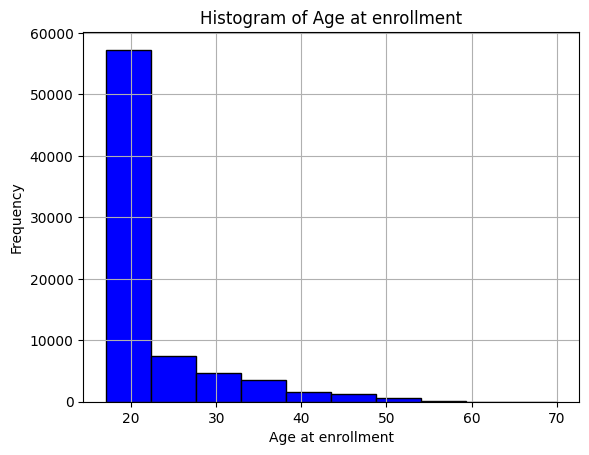

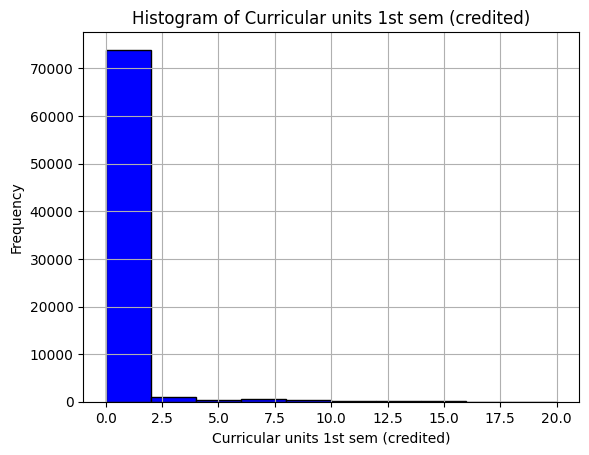

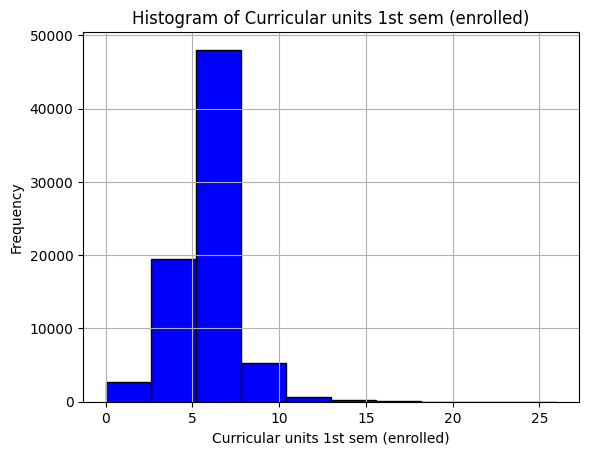

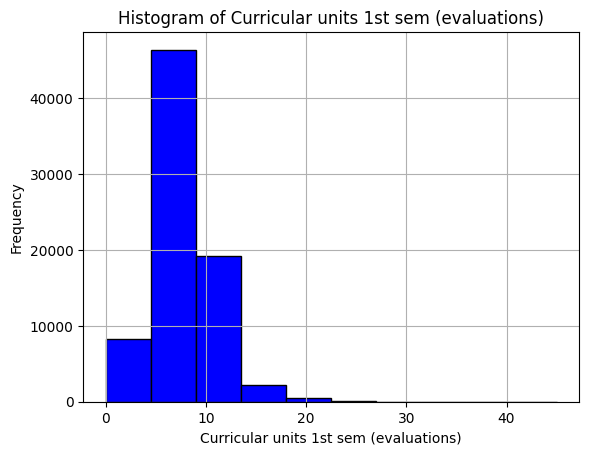

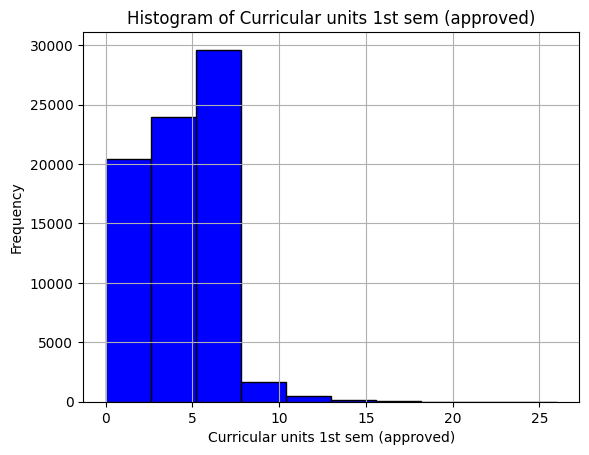

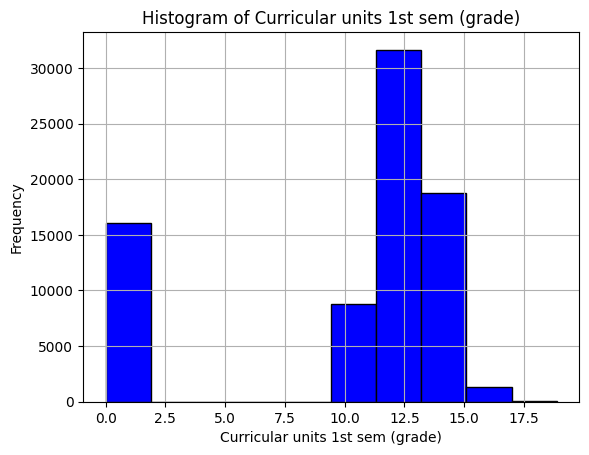

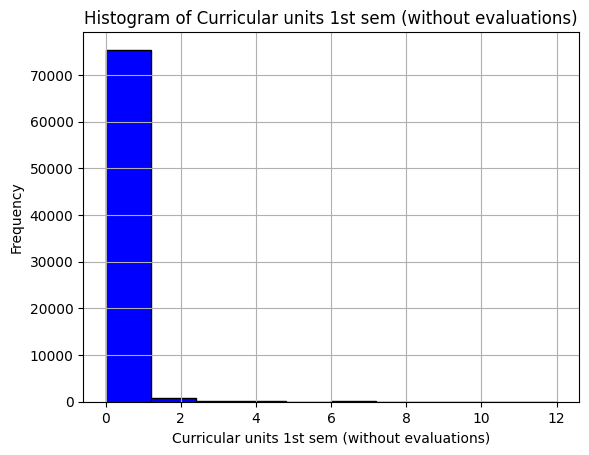

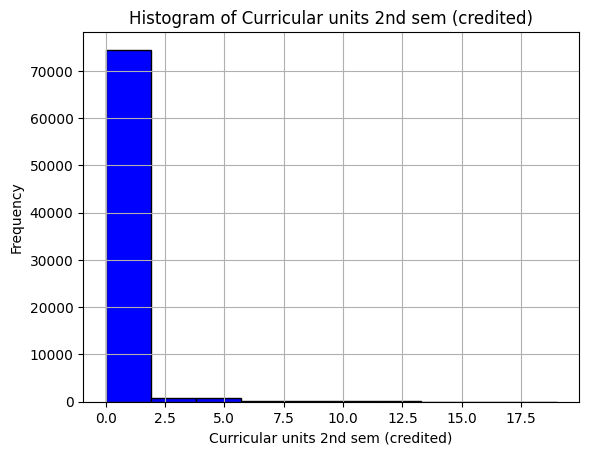

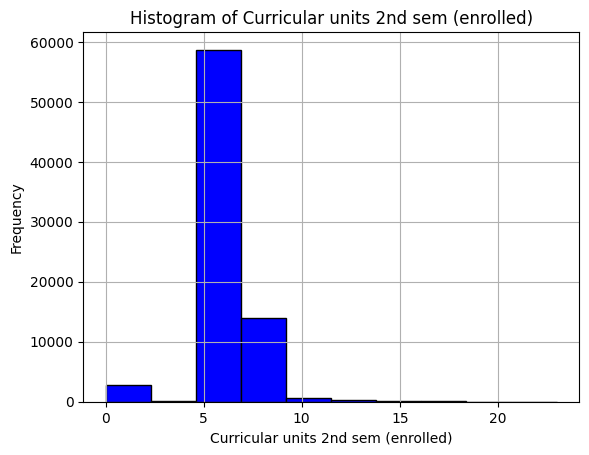

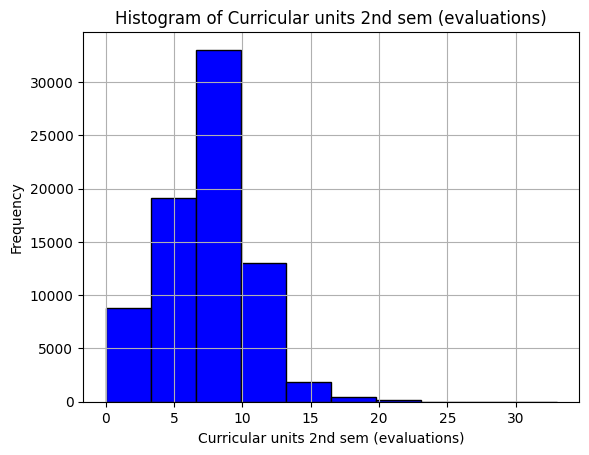

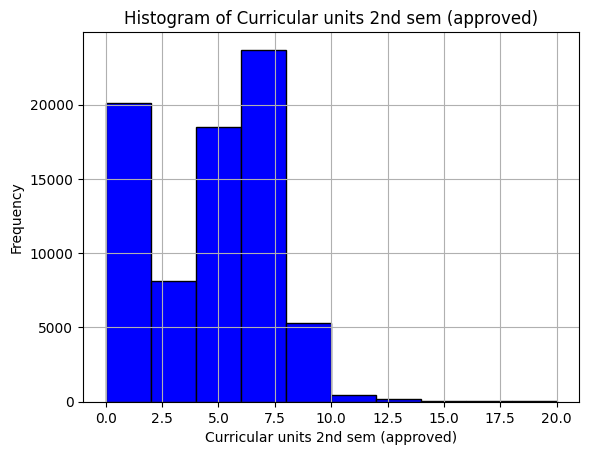

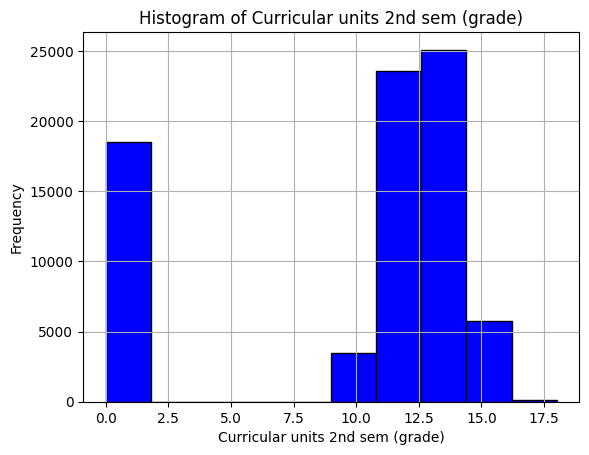

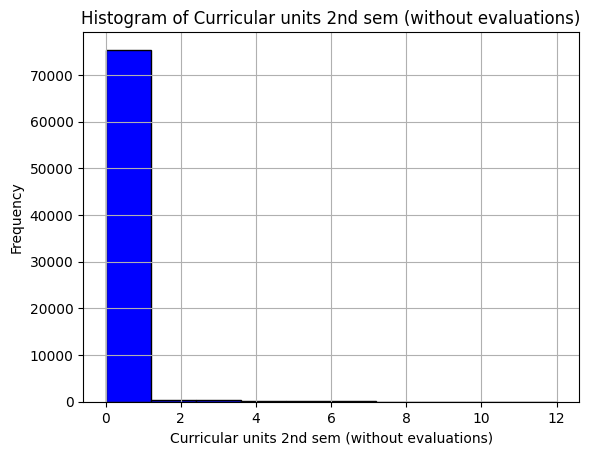

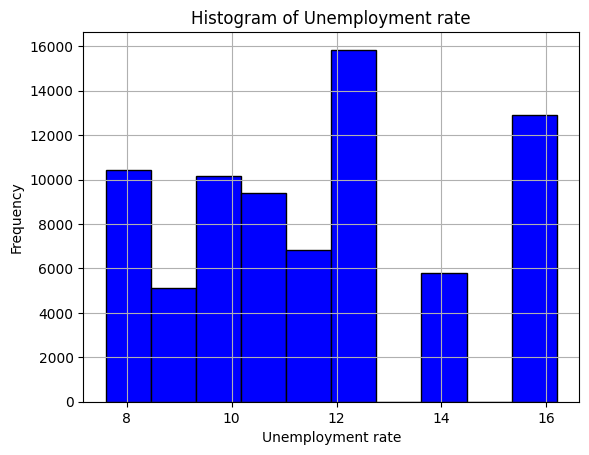

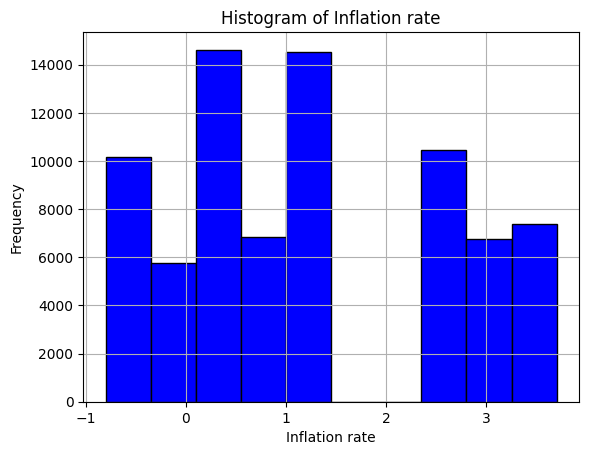

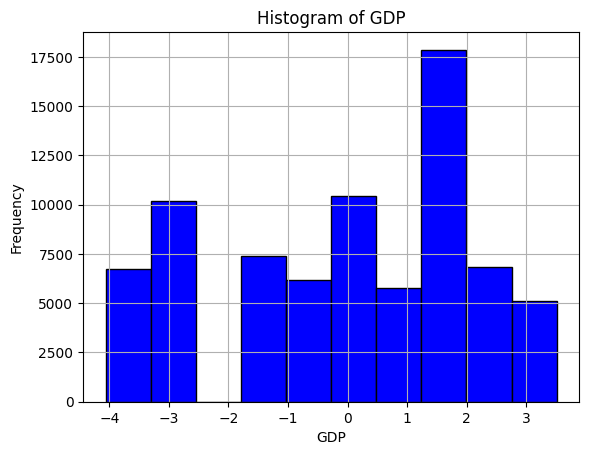

In [50]:
for column in Continuous:
    plt.figure()  # Create a new figure for each histogram
    train[column].hist(bins=10, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Correlations

In [61]:
def my_embed_1(string):
    if string == "Graduate":
        return 1
    elif string == "Dropout":
        return -1
    elif string == "Enrolled":
        return 0
    else:
        logging.warning('Unknown type found')

def my_embed_2(string):
    if string == "Graduate":
        return 1
    elif string == "Dropout":
        return 0
    elif string == "Enrolled":
        return -1
    else:
        logging.warning('Unknown type found')

In [66]:
train["my_embed_1"] = train["Target"].apply(my_embed_1)
train["my_embed_2"] = train["Target"].apply(my_embed_2)

In [71]:
train[["Target", "my_embed_1", "my_embed_2"]].head(5)

,Target,my_embed_1,my_embed_2
id,,,
0,Graduate,1,1
1,Dropout,-1,0
2,Dropout,-1,0
3,Enrolled,0,-1
4,Graduate,1,1


In [73]:
for column in Continuous:
    corr_1 = train[column].corr(train["my_embed_1"])
    print(f"correlation of {column} with embed_1 is {corr_1}")
    corr_2 = train[column].corr(train["my_embed_2"])
    print(f"correlation of {column} with embed_2 is {corr_2}")

correlation of Previous qualification (grade) with embed_1 is 0.13811884617035025
correlation of Previous qualification (grade) with embed_2 is 0.15256198246220437
correlation of Admission grade with embed_1 is 0.17288009282126926
correlation of Admission grade with embed_2 is 0.15312728920491095
correlation of Age at enrollment with embed_1 is -0.32067930010988843
correlation of Age at enrollment with embed_2 is -0.13129147936997415
correlation of Curricular units 1st sem (credited) with embed_1 is 0.03576400003416267
correlation of Curricular units 1st sem (credited) with embed_2 is 0.033396950058618334
correlation of Curricular units 1st sem (enrolled) with embed_1 is 0.2636568102810638
correlation of Curricular units 1st sem (enrolled) with embed_2 is 0.18827021778346
correlation of Curricular units 1st sem (evaluations) with embed_1 is 0.152397926412233
correlation of Curricular units 1st sem (evaluations) with embed_2 is -0.09558864797780223
correlation of Curricular units 1st se

In [74]:
for column in Boolean:
    corr_1 = train[column].corr(train["my_embed_1"])
    print(f"correlation of {column} with embed_1 is {corr_1}")
    corr_2 = train[column].corr(train["my_embed_2"])
    print(f"correlation of {column} with embed_2 is {corr_2}")

correlation of Daytime/evening attendance with embed_1 is 0.12448411928466743
correlation of Daytime/evening attendance with embed_2 is 0.04847821547691187
correlation of Displaced with embed_1 is 0.15006593969833604
correlation of Displaced with embed_2 is 0.0845720094543275
correlation of Educational special needs with embed_1 is -0.0004987453563013441
correlation of Educational special needs with embed_2 is -0.0016064794739226631
correlation of Debtor with embed_1 is -0.24839126792839722
correlation of Debtor with embed_2 is -0.10205496975003576
correlation of Tuition fees up to date with embed_1 is 0.415690754151733
correlation of Tuition fees up to date with embed_2 is 0.1379379084201161
correlation of Gender with embed_1 is -0.3301807300583507
correlation of Gender with embed_2 is -0.21296088177431896
correlation of Scholarship holder with embed_1 is 0.3941243891540627
correlation of Scholarship holder with embed_2 is 0.3275795191765887
correlation of International with embed_1 i

NB: almost all correlations are higher with the first embedding! Apparently that makes more sense. i.e. enrolled is neutral, dropout is negative

### Analysis of number of bins

In [112]:
# Find the number of unique values for each categorical column
number_of_uniques = {}
for column in Categorical:
    number_of_uniques[column] = train[column].nunique()

In [113]:
# Find the number of possible combinations based on the number of bins in categorical and booleans variables
theoretical_bins = 1
for key, value in number_of_uniques.items():
    theoretical_bins *= value
theoretical_bins = theoretical_bins * 2 ** len(Boolean)

In [114]:
print("Total number of possible bins:", theoretical_bins)
print("Number of digits:", np.round(np.log(theoretical_bins) / np.log(10), 1))

Total number of possible bins: 5936492917555200
Number of digits: 15.8


In [101]:
number_of_uniques

{'Marital status': 6,
 'Application mode': 22,
 'Application order': 8,
 'Course': 19,
 'Previous qualification': 21,
 'Nacionality': 18,
 "Mother's qualification": 35,
 "Father's qualification": 39,
 "Mother's occupation": 40,
 "Father's occupation": 56}

### chi-squared

In [127]:
# Create a pandas DataFrame
data = {'Category1': ['A', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B'],
        'Category2': ['X', 'Y', 'X', 'X', 'Y', 'X', 'Z', 'Z', 'Y']}
df = pd.DataFrame(data)

In [128]:
# Create a contingency table
contingency_table = pd.crosstab(df['Category1'], df['Category2'])
contingency_table

Category2,X,Y,Z
Category1,,,
A,3,1,0
B,1,2,2


In [129]:
# Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)

# Cramér's V
n = contingency_table.values.sum()
min_rows_cols = min(contingency_table.shape)
cramers_v = np.sqrt(chi2 / (n * (min_rows_cols - 1)))
print("Cramér's V:", cramers_v)

# Contingency coefficient
contingency_coefficient = np.sqrt(chi2 / (chi2 + n))
print("Contingency coefficient:", contingency_coefficient)

Chi-square statistic: 3.2625
Cramér's V: 0.6020797289396148
Contingency coefficient: 0.515805240252132


In [136]:
column_sums = contingency_table.sum()
column_sums

Category2
X    4
Y    3
Z    2
dtype: int64

In [138]:
row_sums = contingency_table.T.sum()
row_sums

Category1
A    4
B    5
dtype: int64

In [147]:
# Outer product using NumPy
outer_product = np.outer(row_sums, column_sums)
outer_product_df = pd.DataFrame(outer_product, index=row_sums, columns=column_sums)
Expected = outer_product_df / n

In [152]:
difs = (Expected.values - contingency_table.values) ** 2 / Expected.values
difs.sum()

3.2625

In [184]:
def my_chi2(contingency_table):
    column_sums = contingency_table.sum()
    c = len(column_sums)
    row_sums = contingency_table.T.sum()
    r = len(row_sums)

    dof = (c - 1) * (r - 1)
    n = row_sums.sum()
    
    outer_product = np.outer(row_sums, column_sums)
    outer_product_df = pd.DataFrame(outer_product, index=row_sums, columns=column_sums)
    expected = outer_product_df / n

    difs = (expected.values - contingency_table.values) ** 2 / expected.values
    return difs.sum(), -1, dof, expected.values

In [185]:
chi2, p, alpha, expected = my_chi2(contingency_table)
print(chi2)
print(p)
print(alpha)
print(expected)

3.2625
-1
2
[[1.77777778 1.33333333 0.88888889]
 [2.22222222 1.66666667 1.11111111]]


In [186]:
chi2, p, alpha, expected = chi2_contingency(contingency_table)
print(chi2)
print(p)
print(alpha)
print(expected)

3.2625
0.1956848151654713
2
[[1.77777778 1.33333333 0.88888889]
 [2.22222222 1.66666667 1.11111111]]
